# 2-colour imaging: RecB-Halo + Nucleoid (Sytox)

In [1]:
from pyberries.data import DatasetPool
import seaborn.objects as so

data = (DatasetPool(path='D:\DanielThedie\BACMMAN\Timelapse',
                    dsList=['240424_1', '240424_2', '240424_3', '240424_4'],
                    groups=['WT, 0', 'WT, 30 ng/mL', '$\Delta$recA, 0', '$\Delta$recA, 30 ng/mL'],
                    metadata='DateTime'
                    )
        .drop_duplicates(object_name='RecB_spots', subset=['Dataset', 'Position', 'TrackHeadIndices'])
        .assign(Time_min=lambda df: df.Time_min + 15)
        .split_column(col='Group', new_cols=['Strain', 'Cipro'], delimiter=', ')
        )

Dataset 240424_1: loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw', 'Nucleoid']
Dataset 240424_2: loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw', 'Nucleoid']
Dataset 240424_3: loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw', 'Nucleoid']


In [4]:
data.describe()

Bacteria_large


,Group,nObjects,RecBIntensity,Area,SNR,RecBSpotCount,SpineWidth,SpineLength,NextDivisionFrame,PreviousDivisionFrame,Time_min
Dataset,,,,,,,,,,,
240424_1,"WT, 0",42700,757.378456,2.973980,653.838189,0.047986,0.839896,3.081561,NaN,NaN,35.483221
240424_2,"WT, 30 ng/mL",81800,411.211133,3.241622,373.343409,0.124095,0.829387,3.402443,NaN,NaN,39.943356
240424_3,"$\Delta$recA, 0",33000,393.801469,2.968046,362.346179,0.127152,0.850071,3.064079,NaN,NaN,41.072580


RecB_spots


,Group,nObjects,SpineCurvilinearCoord,SpineRadialCoord,SpineLength,SpineRadius,TrackLength,TrackObjectCount,TrackErrorNext,TrackErrorPrev,Raw_intensity,Time_min
Dataset,,,,,,,,,,,,
240424_1,"WT, 0",1189,1.640903,-0.012139,3.352204,0.818470,1.730866,1.730866,0.0,0.0,911.263230,35.595571
240424_2,"WT, 30 ng/mL",3317,2.033589,0.010581,3.977384,0.825185,3.060295,3.060295,0.0,0.0,536.749562,47.047913
240424_3,"$\Delta$recA, 0",1606,1.816526,0.003142,3.771604,0.823880,2.615816,2.615816,0.0,0.0,548.415460,43.701059


Nucleoid


,Group,nObjects,Nucleoid_size,SNR,Time_min
Dataset,,,,,
240424_1,"WT, 0",53000,0.914012,NaN,35.905480
240424_2,"WT, 30 ng/mL",41400,0.409466,NaN,29.101600
240424_3,"$\Delta$recA, 0",32550,0.963876,6.53402,39.293394


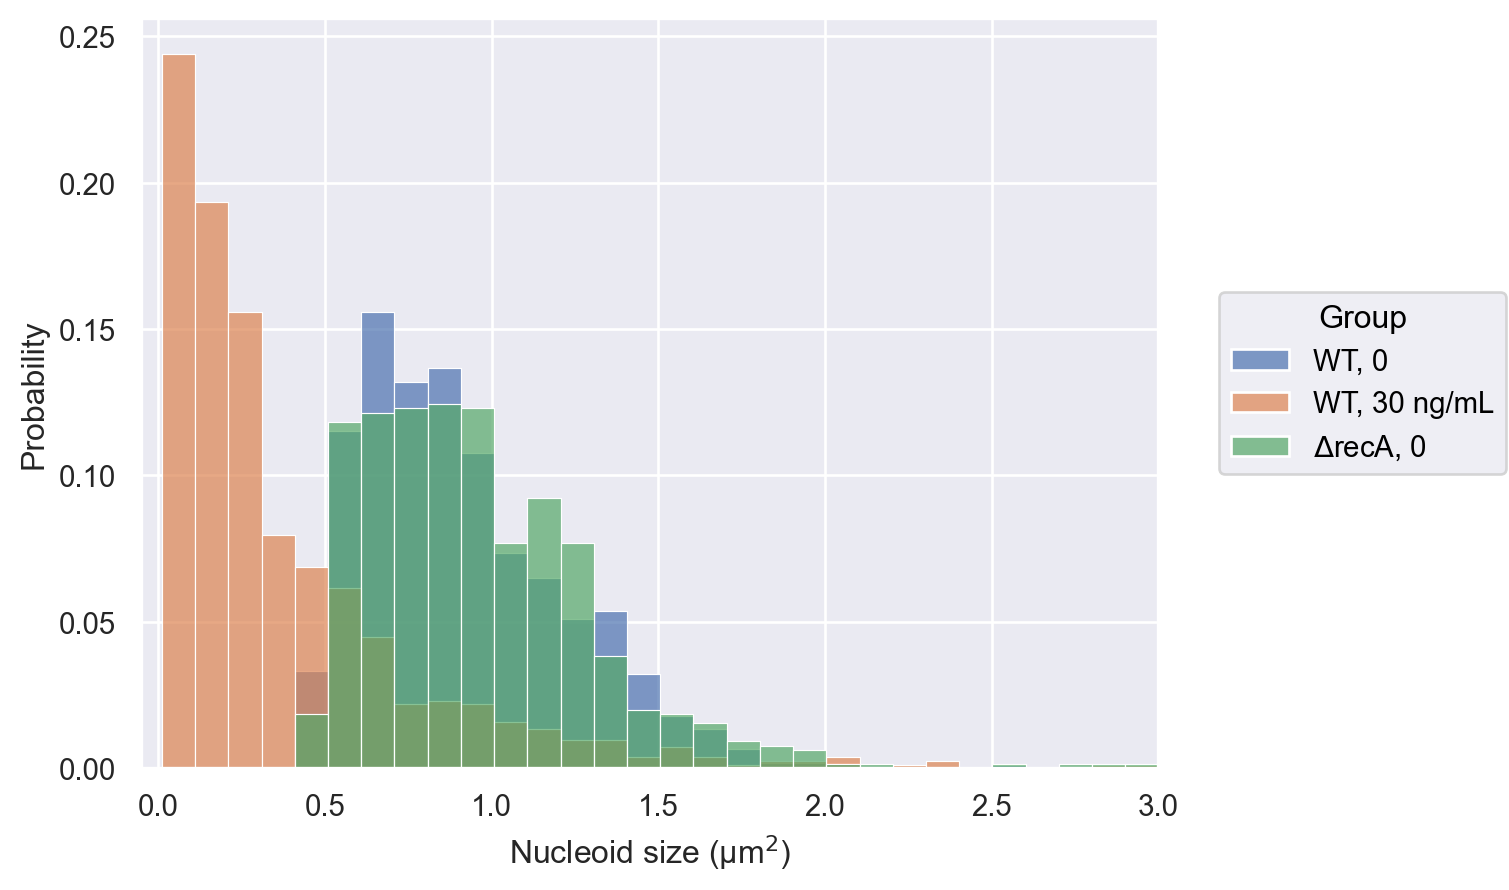

In [21]:
(
    so.Plot(data.Nucleoid, x='Nucleoid_size', color='Group')
    .add(so.Bars(), so.Hist(stat='probability', binwidth=0.1, common_norm=False))
    .limit(x=(-.05, 3))
    .label(x='Nucleoid size (µm$^2$)', y='Probability')
)

In [26]:
df = (data
      .Nucleoid
      .assign(Compact=lambda df: (df.Nucleoid_size < 0.5).astype('int')*100)
      .groupby('Group')
      .agg({'Compact':'mean'})
      )

display(df)

,Compact
Group,
"$\Delta$recA, 0",1.689708
"WT, 0",2.452830
"WT, 30 ng/mL",73.309179
